<a href="https://colab.research.google.com/github/ghluque/Tools-Price-Index/blob/main/Tools_price_index.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Comparación de listas de precios Dic 23 - May 24**

Using gspread

In [ ]:
from google.colab import auth
auth.authenticate_user()

import gspread
#import gspread library
from google.auth import default
creds, _ = default()

gc = gspread.authorize(creds)
# We autorized the creds and we create a new spreadsheet

In [ ]:
!pip install --upgrade gspread #install latest version of gspread

In [ ]:
import pandas as pd
#import Pandas library

Lusqtoff list 2023

In [ ]:
worksheet23 = gc.open_by_url('https://docs.google.com/spreadsheets/d/1hlTuJ2gHKl7fVZ9tt_f_iK2rH2dzroZfCMGzyfKuBUk').sheet1
#Open the spreadsheet by url


In [ ]:
df23 = pd.DataFrame(worksheet23.get_all_records())
df23 = df23.rename(columns={"COD,": "COD"})
df23.head()

,CODIGO,COD,ARTICULO,PRECIO
0,1,llp-400,Bombasumergible,79738.78
1,2,st-1a,Mascarafotosensible,35446.09
2,3,lc-2025,Compresor25,156528.69
3,4,lc-2550b,Compresor50,196404.05
4,5,aa-5000k,Kitcompresor,35446.09


Lusqtoff list 2024

In [ ]:
worksheet24 = gc.open_by_url('https://docs.google.com/spreadsheets/d/19fehnbxJgtT_f6sfM3ETHuW7fq-gf4ZaUMmLkc-Pus4').sheet1
#Open the spreadsheet by url

In [ ]:
df24 = pd.DataFrame(worksheet24.get_all_records())
df24 = df24.rename(columns={"COD,": "COD"})
df24.head()

,CODIGO,COD,ARTICULO,PRECIO
0,1,llp-400,Bombasumergible,91736.07
1,2,st-1a,Mascarafotosensible,40779.22
2,3,lc-2025,Compresor25,180079.59
3,4,lc-2550b,Compresor50,225954.49
4,5,aa-5000k,Kitcompresor,40779.22


Join tables


In [ ]:
df2324 =  df24.join(df23, lsuffix='24', rsuffix='23')
df2324.head()

,CODIGO24,COD24,ARTICULO24,PRECIO24,CODIGO23,COD23,ARTICULO23,PRECIO23
0,1,llp-400,Bombasumergible,91736.07,1,llp-400,Bombasumergible,79738.78
1,2,st-1a,Mascarafotosensible,40779.22,2,st-1a,Mascarafotosensible,35446.09
2,3,lc-2025,Compresor25,180079.59,3,lc-2025,Compresor25,156528.69
3,4,lc-2550b,Compresor50,225954.49,4,lc-2550b,Compresor50,196404.05
4,5,aa-5000k,Kitcompresor,40779.22,5,aa-5000k,Kitcompresor,35446.09


In [ ]:
df2324.columns

Index(['CODIGO24', 'COD24', 'ARTICULO24', 'PRECIO24', 'CODIGO23', 'COD23',
       'ARTICULO23', 'PRECIO23'],
      dtype='object')

In [ ]:
df2324['INDICE']=df2324['PRECIO24']/df2324['PRECIO23']*100
df2324.head()

,CODIGO24,COD24,ARTICULO24,PRECIO24,CODIGO23,COD23,ARTICULO23,PRECIO23,INDICE
0,1,llp-400,Bombasumergible,91736.07,1,llp-400,Bombasumergible,79738.78,115.045741
1,2,st-1a,Mascarafotosensible,40779.22,2,st-1a,Mascarafotosensible,35446.09,115.045750
2,3,lc-2025,Compresor25,180079.59,3,lc-2025,Compresor25,156528.69,115.045740
3,4,lc-2550b,Compresor50,225954.49,4,lc-2550b,Compresor50,196404.05,115.045739
4,5,aa-5000k,Kitcompresor,40779.22,5,aa-5000k,Kitcompresor,35446.09,115.045750


In [ ]:
df2324.describe()

,CODIGO24,PRECIO24,CODIGO23,PRECIO23,INDICE
count,39.000000,39.000000,39.000000,39.000000,39.000000
mean,20.000000,141407.109744,20.000000,122913.817179,115.045740
std,11.401754,89560.486142,11.401754,77847.720911,0.000006
min,1.000000,27470.000000,1.000000,23877.460000,115.045728
25%,10.500000,67960.780000,10.500000,59072.840000,115.045737
50%,20.000000,129109.000000,20.000000,112224.060000,115.045740
75%,29.500000,194521.940000,29.500000,169082.265000,115.045741
max,39.000000,392436.420000,39.000000,341113.390000,115.045757


<Axes: ylabel='Frequency'>

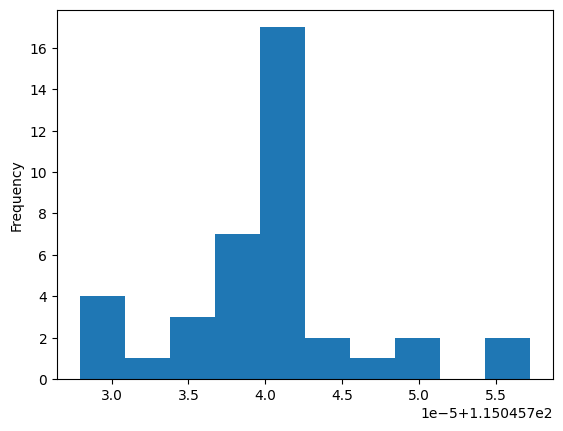

In [ ]:
df2324["INDICE"].plot.hist()